Outline:

1. Softmax cross entropy loss
    * Softmax
    * Log loss
1. Something else

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=2)
%matplotlib inline

### Softmax math

$$ \text{Normalize}(\begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix})  = \begin{bmatrix} \frac{x_1}{x_1 + x_2 + x_3} \\ 
\frac{x_2}{x_1 + x_2 + x_3} \\
\frac{x_3}{x_1 + x_2 + x_3}
\end{bmatrix} $$

$$ \text{Softmax}(\begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix})  = \begin{bmatrix} \frac{e^{x_1}}{e^{x_1} + e^{x_2} + e^{x_3}} \\ 
\frac{e^{x_2}}{e^{x_1} + e^{x_2} + e^{x_3}} \\
\frac{e^{x_3}}{e^{x_1} + e^{x_2} + e^{x_3}}
\end{bmatrix} $$

## Overall log loss formula

$$ \sum_{i}{(- y_i * log(p_i) - (1 - y_i) * log(1-p_i))} $$

## Intuition

### Case 1: $y_i = 0$

Formula becomes:

$$ \begin{align} &\sum_{i}{(- 0 * log(p_i) - (1 - 0) * log(1-p_i))} \\
=  &\sum_{i}{- log(1-p_i))} \end{align}$$

### Plot of loss when $y_i = 0$

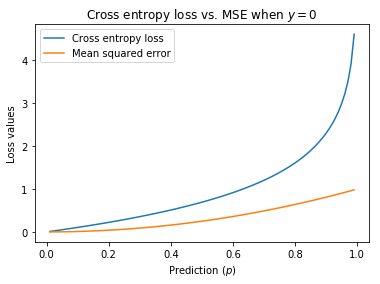

In [2]:
x = np.linspace(0.01, 0.99, 99)
y1 = -1.0 * np.log(1 - x)
y2 = (x - 0) ** 2
plt.plot(x, y1);
plt.plot(x, y2);
plt.legend(['Cross entropy loss', 'Mean squared error'])

plt.title("Cross entropy loss vs. MSE when $y = 0$")
plt.xlabel("Prediction ($p$)")
plt.ylabel("Loss values");
plt.savefig("Log_loss_vs_MSE_y_eq_0.png")

When $y=0$, loss can become theoretically infinite as $p$ approaches 1.

### Case 2: $y_i = 1$

Formula reduces to:

$$ \begin{align} &\sum_{i}{(- 1 * log(p_i) - (1 - 1) * log(1-p_i))} \\
=  &\sum_{i}{- log(p_i)} \end{align}$$

### Plot of loss when $y_i = 1$

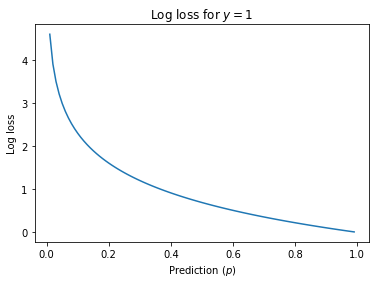

In [3]:
x = np.linspace(0.01, 0.99, 99)
y = -1.0 * np.log((x))

plt.plot(x, y);
plt.title("Log loss for $y = 1$")
plt.xlabel("Prediction ($p$)")
plt.ylabel("Log loss");

### Numerically stable softmax math

$$ log(softmax(x_j)) = log(\frac{e^{x_j}}{\sum_i^n e^{x_j}}) = x_j - logsumexp(X) $$

$$ e^{x - logsumexp(x)} = softmax(x) $$

$$ logsumexp(X) = log(\sum_i^n e^{x_i}) = c + log(\sum_i^n e^{x_i - c}) $$

### Probability normalization

$$ \begin{bmatrix} p_1 \\ p_2 \\ p_3 \\ \vdots \\ p_n \end{bmatrix} \Rightarrow \begin{bmatrix} p_1 & 1-p_1 \\ p_2 & 1-p_2 \\ p_3 & 1-p_3 \\ \vdots & \vdots \\ p_n & 1-p_n \end{bmatrix} $$ 

Opposite:

$$ \begin{bmatrix} p_1 & 1-p_1 \\ p_2 & 1-p_2 \\ p_3 & 1-p_3 \\ \vdots & \vdots \\ p_n & 1-p_n \end{bmatrix}_{grad} \Rightarrow \begin{bmatrix} p_1 \\ p_2 \\ p_3 \\ \vdots \\ p_n \end{bmatrix}_{grad} $$ 

test_indices(p, y, 1,1)

### One hot encoding

$$ [0, 2, 1] \Rightarrow \begin{bmatrix} 1 & 0 & 0 & \ldots & 0 \\ 0 & 0 & 1 & \ldots & 0 \\ 0 & 1 & 0 & \ldots & 0 \end{bmatrix} $$ 

### Learning rate decay

#### Exponential

$$ \alpha_t = \alpha * \delta^t $$

$$ 0 \leq \delta \leq 1 $$

#### Linear

$$ \alpha_t = \alpha_{start} - (\alpha_{start} - \alpha_{end}) * \frac{t}{N} $$

## SGD Momentum gradient formula

$ \text{update} = \nabla_t + \mu * \nabla_{t-1} + \mu^2 * \nabla_{t-2} + \ldots $

In [29]:
0.9 ** 3

0.7290000000000001

# Weight init

In [30]:
n_feat = 784
n_hidden = 256

np.random.seed(190131)

In [31]:
a = np.random.randn(1, n_feat)

In [32]:
b = np.random.randn(n_feat, n_hidden)

(array([ 5.,  6., 20., 43., 42., 61., 40., 23., 11.,  5.]),
 array([-75.67, -60.77, -45.86, -30.96, -16.06,  -1.16,  13.75,  28.65,
         43.55,  58.46,  73.36]),
 <a list of 10 Patch objects>)

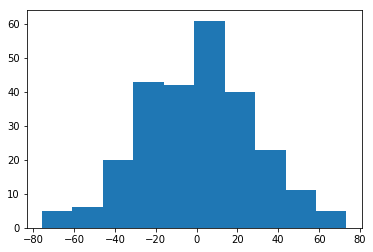

In [33]:
plt.hist(np.dot(a, b).reshape(n_hidden))
plt.title("Weight ini")

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))